In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [85]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# set parameters
beta_0 = 1
beta_1 = 1
alpha = 0.95

## Problem2-(a)

In [34]:
sample_size = [10, 50, 200]
for num in sample_size:
    globals()['x_{}'.format(num)] = np.random.uniform(0,2,num)
    globals()['resid_{}'.format(num)] = np.random.uniform(-1,1,num)

In [37]:
df_10 = pd.DataFrame({'x': list(x_10), 'resid': list(resid_10)})
df_50 = pd.DataFrame({'x': list(x_50), 'resid': list(resid_50)})
df_200 = pd.DataFrame({'x': list(x_200), 'resid': list(resid_200)})

In [40]:
df_10['y'] = df_10['x'] + 1 + df_10['resid']
df_50['y'] = df_50['x'] + 1 + df_50['resid']
df_200['y'] = df_200['x'] + 1 + df_200['resid']

### (1) calculate beta_LS

In [42]:
result_10 = smf.ols('y ~ x', data = df_10).fit()
result_50 = smf.ols('y ~ x', data = df_50).fit()
result_200 = smf.ols('y ~ x', data = df_200).fit()

In [45]:
print("estimated beta under sample size 10: ", result_10.params[1])
print("estimated beta under sample size 50: ", result_50.params[1])
print("estimated beta under sample size 200: ", result_200.params[1])

estimated beta under sample size 10:  0.5681644740536715
estimated beta under sample size 50:  1.174801385031427
estimated beta under sample size 200:  0.9742738334454812


### (2) calculate t-ratio

In [53]:
t_10 = (result_10.params[1]-1)/result_10.bse[1]
t_50 = (result_50.params[1]-1)/result_50.bse[1]
t_200 = (result_200.params[1]-1)/result_200.bse[1]

In [54]:
print("t-ratio under sample size 10: ", t_10)
print("t-ratio under sample size 50: ", t_50)
print("t-ratio under sample size 200: ", t_200)

t-ratio under sample size 10:  -1.3589853940778511
t-ratio under sample size 50:  1.2291736010620207
t-ratio under sample size 200:  -0.37007734587618557


### (3) LS residuals

In [56]:
resid_hat_10 = list(result_10.resid)
resid_hat_50 = list(result_50.resid)
resid_hat_200 = list(result_200.resid)

In [57]:
resid_hat_10

[0.08800156825399075,
 -1.0619093030744287,
 0.28795965602022244,
 0.15700863611446358,
 -0.6317944919826319,
 -0.1195677097155019,
 0.6062960749702841,
 0.5620599150684484,
 -0.2854726070489244,
 0.3974182613940884]

## Problem2-(b)

In [62]:
n = 10 # should designate the number of drawing
sample_result = np.random.choice(resid_hat_10, size= n, replace=True)

In [63]:
sample_result

array([ 0.08800157,  0.08800157, -1.0619093 , -0.11956771, -0.28547261,
        0.56205992, -0.28547261,  0.08800157,  0.39741826, -1.0619093 ])

## Problem2-(c)

<pre>
In lecture note, it says that B = 400 or 1000 is sufficient. 
However, for a direct comparison with the result from Problem2-(d), I will use <b>B = 200</b>

Roadamp
For each sample size n = 10, 50, 200, apply residual bootstrap as follows:
1. Set B = 200
2. Resample the residuals with replacement using code in (b), and obtain bootstrapped residual vector (B_resid)
3. Using the original regressor and generated B_resid, calculate bootstrapped y (B_y) 
4. Regress B_y on x and then get bootstrapped_beta (B_beta) & get t-ratio (B_t)
5. repeat this B=200 times by going back to 2 
</pre>

In [66]:
B = 200 # set the number of bootstrap iteration 

In [67]:
# Function Below Follows the Suggested Roadmap
def Bootstrap(Residuals, Regressors, n):
    '''
    input eg. resid_hat_10, x_10, 10
    output B_beta & B_t
    '''
    B_beta = []
    B_t = []
    
    for i in range(B):
        #1.Resample the Residuals
        resampled_resid = np.random.choice(Residuals, size= n, replace=True)
        
        #2.Calculate B_y
        target_df = pd.DataFrame({'x': list(Regressors), 'resid': list(resampled_resid)})
        target_df['y'] = target_df['x'] + 1 + target_df['resid']
        
        #3.Regress B_y on x
        target_result = smf.ols('y ~ x', data = target_df).fit()
        
        #4.Calculate B_beta
        B_beta.append(target_result.params[1])
        
        #5.Calculate B_t
        B_t.append((target_result.params[1]-1)/target_result.bse[1])
        
        
    return B_beta, B_t

In [72]:
B_beta_10, B_t_10 = Bootstrap(resid_hat_10, x_10, 10)
B_beta_50, B_t_50 = Bootstrap(resid_hat_50, x_50, 50)
B_beta_200, B_t_200 = Bootstrap(resid_hat_200, x_200, 200)

In [118]:
print("95th percentile of Beta_LS under sample size 10: ",np.quantile(np.array(B_beta_10), alpha))
print("95th percentile of Beta_LS under sample size 50: ",np.quantile(np.array(B_beta_50), alpha))
print("95th percentile of Beta_LS under sample size 200: ",np.quantile(np.array(B_beta_200), alpha))

95th percentile of Beta_LS under sample size 10:  1.4285671512109575
95th percentile of Beta_LS under sample size 50:  1.2249026534819407
95th percentile of Beta_LS under sample size 200:  1.1114020586440891


In [119]:
print("95th percentile of t-ratio under sample size 10: ",np.quantile(np.array(B_t_10), alpha))
print("95th percentile of t-ratio under sample size 50: ",np.quantile(np.array(B_t_50), alpha))
print("95th percentile of t-ratio under sample size 200: ",np.quantile(np.array(B_t_200), alpha))

95th percentile of t-ratio under sample size 10:  1.840883169290615
95th percentile of t-ratio under sample size 50:  1.5454808908573863
95th percentile of t-ratio under sample size 200:  1.6266837992219405


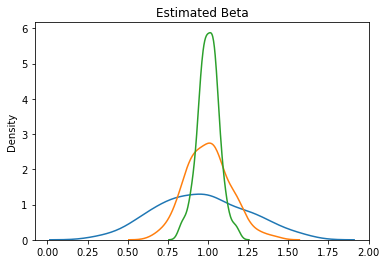

In [109]:
bins = [x for x in range(1,2)]

ax = sns.distplot(B_beta_10, bins, label = '10')
ax = sns.distplot(B_beta_50, bins, label = '50')
ax = sns.distplot(B_beta_200, bins, label = '200')

plt.title('Estimated Beta')
plt.show()

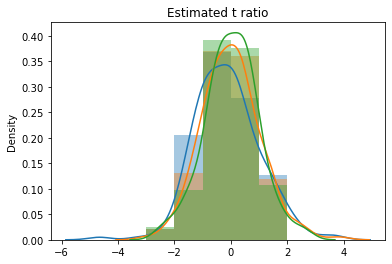

In [112]:
bins = [x for x in range(-3,3)]

ax = sns.distplot(B_t_10, bins, label = '10')
ax = sns.distplot(B_t_50, bins, label = '50')
ax = sns.distplot(B_t_200, bins, label = '200')

plt.title('Estimated t ratio')
plt.show()

<pre>
as sample size grows, the estimated value shows less variance. 
green line: sample size 200
orange line: sample size 50 
blue line: sample size 10
</pre>

## Problem2-(d)

<pre>
This question requires us to re-draw the error from the conditional distribution, rather than resample it from the estimated residuals.

So here is my plan:
For each sample size n = 10, 50, 200
1. Redraw error from the uniform distribution.
2. Using the original regressor and re-drawn error, calculate simulated y (S_y)
3. Regress S_y on x and then get simulated_beta (S_beta) & get t-ratio (S_t)
5. repeat this 200 times by going back to 1
</pre>

In [120]:
# Function Below Follows the Suggested Roadmap
def Simulation(Regressors, n):
    '''
    input eg. x_10, 10
    output S_beta & S_t
    '''
    S_beta = []
    S_t = []
    
    for i in range(200):
        #1.Redraw the Residuals
        redrawn_resid = np.random.uniform(-1,1,n)

        #2.Calculate S_y
        target_df = pd.DataFrame({'x': list(Regressors), 'resid': list(redrawn_resid)})
        target_df['y'] = target_df['x'] + 1 + target_df['resid']
        
        #3.Regress S_y on x
        target_result = smf.ols('y ~ x', data = target_df).fit()
        
        #4.Calculate B_beta
        S_beta.append(target_result.params[1])
        
        #5.Calculate B_t
        S_t.append((target_result.params[1]-1)/target_result.bse[1])
        
        
    return S_beta, S_t

In [121]:
S_beta_10, S_t_10 = Simulation(x_10, 10)
S_beta_50, S_t_50 = Simulation(x_50, 50)
S_beta_200, S_t_200 = Simulation(x_200, 200)

In [123]:
print("95th percentile of Beta_LS under sample size 10: ",np.quantile(np.array(S_beta_10), alpha))
print("95th percentile of Beta_LS under sample size 50: ",np.quantile(np.array(S_beta_50), alpha))
print("95th percentile of Beta_LS under sample size 200: ",np.quantile(np.array(S_beta_200), alpha))

95th percentile of Beta_LS under sample size 10:  1.631127657678007
95th percentile of Beta_LS under sample size 50:  1.292214362670521
95th percentile of Beta_LS under sample size 200:  1.1180600708209323


In [124]:
print("95th percentile of t-ratio under sample size 10: ",np.quantile(np.array(S_t_10), alpha))
print("95th percentile of t-ratio under sample size 50: ",np.quantile(np.array(S_t_50), alpha))
print("95th percentile of t-ratio under sample size 200: ",np.quantile(np.array(S_t_200), alpha))

95th percentile of t-ratio under sample size 10:  2.0052007062546915
95th percentile of t-ratio under sample size 50:  2.0989769705080525
95th percentile of t-ratio under sample size 200:  1.6931121186946687


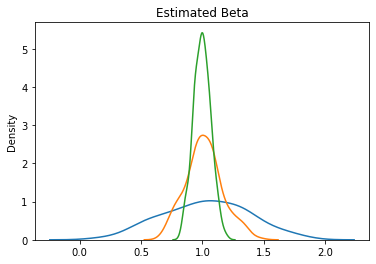

In [125]:
bins = [x for x in range(1,2)]

ax = sns.distplot(S_beta_10, bins, label = '10')
ax = sns.distplot(S_beta_50, bins, label = '50')
ax = sns.distplot(S_beta_200, bins, label = '200')

plt.title('Estimated Beta')
plt.show()

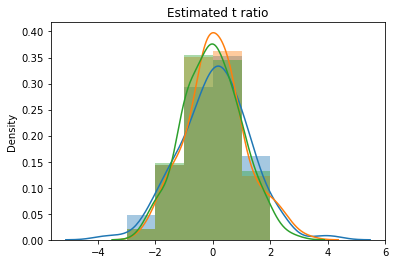

In [126]:
bins = [x for x in range(-3,3)]

ax = sns.distplot(S_t_10, bins, label = '10')
ax = sns.distplot(S_t_50, bins, label = '50')
ax = sns.distplot(S_t_200, bins, label = '200')

plt.title('Estimated t ratio')
plt.show()

<pre>
as sample size grows, the estimated value shows less variance. 
green line: sample size 200
orange line: sample size 50 
blue line: sample size 10
</pre>

## Problem2-(e)

### 1. comparison btw (c) and (d)

<pre>
Denote the result of (c) with Bootstrap and (d) with Simulation.
As sample size goes up, both methods show quite similar results. 
95th percentile of Beta estimate from both methods achieved close value with 1. (1.111, 1.118 respectively)

However, Bootstrap outperforms under restricted sample size. 
Under N=10, Bootstrap's 95th percetnrile of Beta estimate was 1.42, but that of Simulation was 1.63. 

i.e,
Asymptotically, both methods show similar result. 
But, under restricted sample number, Bootstrap showed better performance
</pre>

### 2. Compare to 95th Percentile of asymp. dist. of t_n

In [135]:
from scipy.stats import norm
print("95th percentile of asymp. dist. of t_n:", norm.ppf(0.95))

95th percentile of asymp. dist. of t_n: 1.6448536269514722


<pre>
As I computed above, 95th percentile of asymp. dist. of t_n is 1.64. 
And the results in (c) and (d) both showed that the calculated t-ratio gets closer to 1.64 
as sample size grows. 

This result supports the fact that t-statistics is asymptotically pivotal
</pre>